# Step-by-step analysis of the load_diabetes() dataset using Python and pandas. 

Load the Dataset

Explore the Dataset

Data Cleaning and Preprocessing

Data Visualization

Basic Statistical Analysis

Step 1: Load the Dataset


In [1]:
pip install sklearn

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-

Step 1: Load the Dataset


In [11]:
from sklearn.datasets import load_diabetes
import pandas as pd

# Load the dataset
diabetes = load_diabetes()
data = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
data['target'] = diabetes.target

# Display the first few rows of the dataset
print(data.head())


        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  


In the context of machine learning, the "target value" (also known as the "label" or "output") in a training dataset is the value that the model is being trained to predict. For example, if you're training a model to predict house prices, the target value would be the actual price of each house in your training data.

Step 2: Explore the Dataset

In [12]:
# Display basic information about the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB
None


Display summary statistics

In [14]:
print(data.describe())

                age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123988e-01 -1.267807e-01   
25%   -3.729927e-02 -4.464164e-02 -3.422907e-02 -3.665608e-02 -3.424784e-02   
50%    5.383060e-03 -4.464164e-02 -7.283766e-03 -5.670422e-03 -4.320866e-03   
75%    3.807591e-02  5.068012e-02  3.124802e-02  3.564379e-02  2.835801e-02   
max    1.107267e-01  5.068012e-02  1.705552e-01  1.320436e-01  1.539137e-01   

                 s2            s3            s4            s5            s6  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean   3.918434e-17 -5.777179e-18 -9.042540e-18  9.293722e-17  1.130318e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.

Check for missing values


In [15]:
print(data.isnull().sum())

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64


Step 3: Data Cleaning and Preprocessing

We create an instance of StandardScaler. This object will be used to fit the data (calculate the mean and standard deviation) and then transform it.

This line of code standardizes the feature columns in your dataset. Let's break it down further:

data.columns[:-1] selects all the columns in your dataset except the last one (target column). This is because we want to standardize only the feature columns.

scaler.fit_transform(data[data.columns[:-1]]) first fits the scaler to the selected data (calculates the mean and standard deviation for each feature) and then transforms the data by subtracting the mean and scaling to unit variance.

data[data.columns[:-1]] = ... assigns the transformed data back to the original DataFrame, replacing the original feature columns with their standardized versions.

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data[data.columns[:-1]] = scaler.fit_transform(data[data.columns[:-1]])

Standard deviation is a measure of the amount of variation or dispersion in a set of values. In simpler terms, it tells you how spread out the values in a dataset are from the mean (average) value.

In Basic Points:

Low Standard Deviation: Indicates that the data points are close to the mean. The values are not widely spread.

High Standard Deviation: Indicates that the data points are spread out over a wider range. There's more variability in the values.

The goal of standardization is to center the data around zero and have a standard deviation of one. This is especially useful for machine learning algorithms that are sensitive to the scale of input features.

## Scaling input features
In machine learning, scaling input features means adjusting the values of the features so that they fall within a specific range or have a certain mean and standard deviation. This process is essential for many machine learning algorithms that are sensitive to the scale of the data, such as gradient descent-based algorithms (e.g., linear regression, neural networks) and distance-based algorithms (e.g., k-nearest neighbors, support vector machines).

In [17]:
# Display the first few rows of the normalized dataset
print(data.head())

        age       sex       bmi        bp        s1        s2        s3  \
0  0.800500  1.065488  1.297088  0.459841 -0.929746 -0.732065 -0.912451   
1 -0.039567 -0.938537 -1.082180 -0.553505 -0.177624 -0.402886  1.564414   
2  1.793307  1.065488  0.934533 -0.119214 -0.958674 -0.718897 -0.680245   
3 -1.872441 -0.938537 -0.243771 -0.770650  0.256292  0.525397 -0.757647   
4  0.113172 -0.938537 -0.764944  0.459841  0.082726  0.327890  0.171178   

         s4        s5        s6  target  
0 -0.054499  0.418531 -0.370989   151.0  
1 -0.830301 -1.436589 -1.938479    75.0  
2 -0.054499  0.060156 -0.545154   141.0  
3  0.721302  0.476983 -0.196823   206.0  
4 -0.054499 -0.672502 -0.980568   135.0  


Step 4: Data Visualization

A histplot (histogram plot) is a powerful visualization tool that helps in understanding the distribution of a dataset. It is particularly useful in the data cleaning process and when analyzing the target variable in a machine learning project.

Histograms allow you to identify outliers that deviate significantly from the rest of the data. Outliers can skew the results of your analysis or model, so it's important to detect and handle them appropriately.

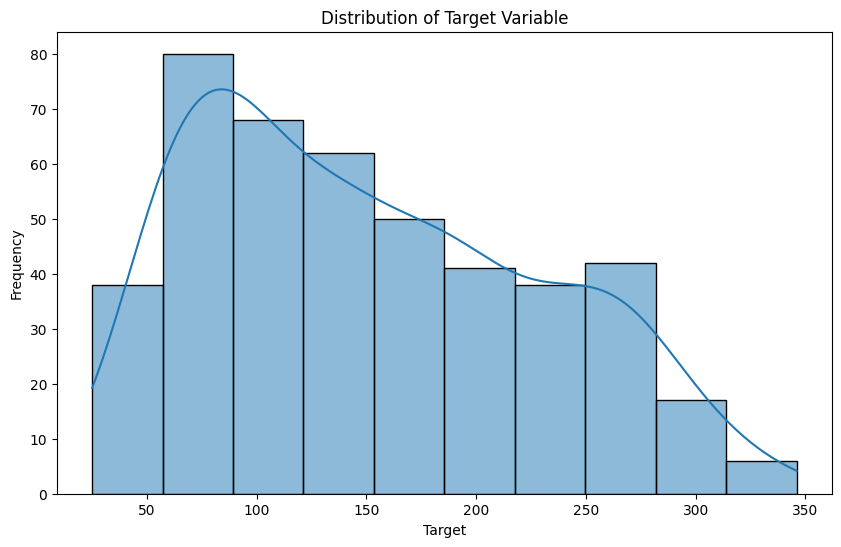

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data[data.columns[:-1]] = scaler.fit_transform(data[data.columns[:-1]])
# Plot the distribution of the target variable
plt.figure(figsize=(10, 6))
sns.histplot(data['target'], kde=True)
# Setting kde=True enables the Kernel Density Estimate (KDE) 
# plot in certain functions. KDE is a way to estimate the probability 
# density function of a continuous random variable, 
# which helps visualize the distribution of data.
plt.title('Distribution of Target Variable')
plt.xlabel('Target')
plt.ylabel('Frequency')
plt.show()

Plot the correlation matrix


A correlation matrix is a table that displays the correlation coefficients between multiple variables in a dataset. It helps you understand the relationships and dependencies between these variables. The values in the matrix range from -1 to 1, where:

1 indicates a perfect positive correlation (variables move in the same direction).

-1 indicates a perfect negative correlation (variables move in opposite directions).

0 indicates no correlation (no linear relationship between variables).

Interpretation
The heatmap shows the correlation coefficients between pairs of variables.

The color scale (from cool to warm) represents the strength and direction of the correlation.

Red cells indicate a strong positive correlation.

Blue cells indicate a strong negative correlation.

White cells indicate no correlation.

The numbers within the cells are the correlation coefficients, ranging from -1 to 1:

1: Perfect positive correlation

-1: Perfect negative correlation

0: No correlation

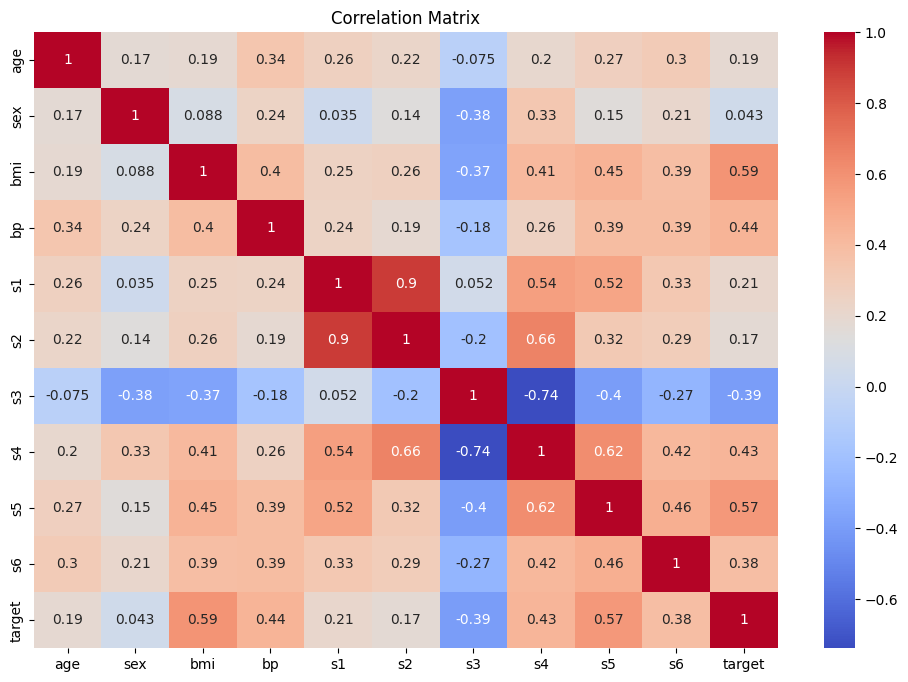

In [9]:
plt.figure(figsize=(12, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Step 5: Basic Statistical Analysis

The mean gives you the average value of the target variable.

The median gives you the middle value of the target variable when sorted.

These two measures provide a good understanding of the central tendency of the target variable in your dataset.

In [10]:
# Calculate the mean and median of the target variable
mean_target = data['target'].mean()
median_target = data['target'].median()

print(f"Mean of target variable: {mean_target}")
print(f"Median of target variable: {median_target}")

# Calculate the correlation between features and the target variable
correlation_with_target = correlation_matrix['target'].sort_values(ascending=False)
print(correlation_with_target)

Mean of target variable: 152.13348416289594
Median of target variable: 140.5
target    1.000000
bmi       0.586450
s5        0.565883
bp        0.441482
s4        0.430453
s6        0.382483
s1        0.212022
age       0.187889
s2        0.174054
sex       0.043062
s3       -0.394789
Name: target, dtype: float64


Text(0, 0.5, 'BMI')

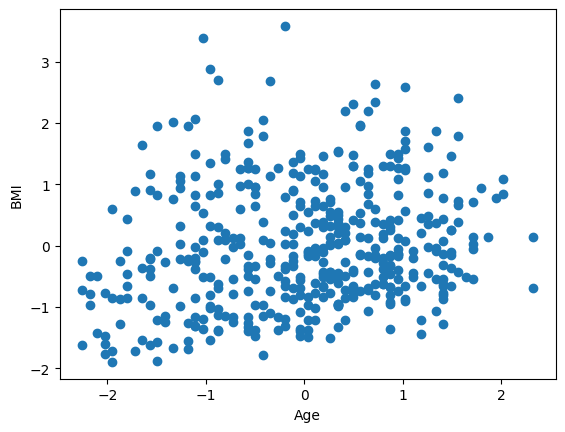

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.scatter(data['age'],data['bmi'])
plt.xlabel("Age")
plt.ylabel("BMI")

The line X = data.iloc[:, :-1] is used to select and extract a subset of the data from a DataFrame, specifically all rows and all columns except the last one.

The line y = data.iloc[:, -1] is used to select and extract the last column of a DataFrame, which is typically the target variable

In [23]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [24]:
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.800500,1.065488,1.297088,0.459841,-0.929746,-0.732065,-0.912451,-0.054499,0.418531,-0.370989
1,-0.039567,-0.938537,-1.082180,-0.553505,-0.177624,-0.402886,1.564414,-0.830301,-1.436589,-1.938479
2,1.793307,1.065488,0.934533,-0.119214,-0.958674,-0.718897,-0.680245,-0.054499,0.060156,-0.545154
3,-1.872441,-0.938537,-0.243771,-0.770650,0.256292,0.525397,-0.757647,0.721302,0.476983,-0.196823
4,0.113172,-0.938537,-0.764944,0.459841,0.082726,0.327890,0.171178,-0.054499,-0.672502,-0.980568


In [25]:
y

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: target, Length: 442, dtype: float64